In [1]:
from I3Tray import *
from icecube import icetray, dataclasses, phys_services, sim_services, dataio,  earthmodel_service, neutrino_generator, tableio, hdfwriter
from icecube.simprod import segments
from icecube.icetray import I3Units, I3Frame
from icecube.dataclasses import I3Particle
from icecube.simclasses import I3MMCTrack
from icecube.icetray import I3Units, OMKey, I3Frame
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
import sys, os
import math
import os.path
from os import path

### 1) Cumulative pulse count across all OMs...

In [37]:
dom_pos=[]
for i in range(0,400):
    if path.exists("/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst")==True:
        infile_name="/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst"
        infile=dataio.I3File(infile_name)
        infile.pop_frame()
        for frame in infile:
            infile.pop_frame()
            pulseseriesmap=frame['I3Photons']
            for omkey in pulseseriesmap.keys():
                for pulse in pulseseriesmap[omkey]:
                    dom_pos.append(((omkey.string-1)*20)+omkey.om)  

RuntimeError: input stream error

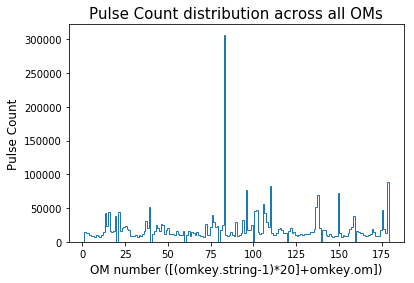

In [38]:
plt.hist(dom_pos,bins=np.max(dom_pos),histtype='step')
plt.xlabel('OM number ([(omkey.string-1)*20]+omkey.om])',fontsize=12)
plt.ylabel('Pulse Count',fontsize=12)
plt.title("Pulse Count distribution across all OMs",fontsize=15)
plt.ticklabel_format(style='plain')
plt.show()

In [16]:
max(np.bincount(dom_pos))

300027

### 2) Pulse count for the highest hit OM on a per event basis...

In [15]:
dom_pos=[]
highest_hits=[]
for i in range(0,400):
    if path.exists("/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst")==True:
        infile_name="/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst"
        infile=dataio.I3File(infile_name)
        infile.pop_frame()
        for frame in infile:
            infile.pop_frame()
            pulseseriesmap=frame['I3Photons']
            for omkey in pulseseriesmap.keys():
                for pulse in pulseseriesmap[omkey]:
                    dom_pos.append(((omkey.string-1)*20)+omkey.om)  
            if (len(dom_pos)!=0):
                highest_hits.append(dom_pos.count(max(set(dom_pos),key=dom_pos.count)))
            else:
                highest_hits.append(0)
            dom_pos=[]

RuntimeError: input stream error

In [17]:
np.max(highest_hits)

292221

In [16]:
events = np.arange(len(highest_hits))

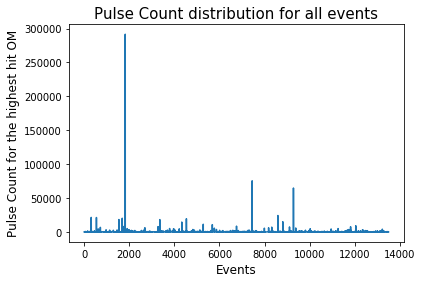

In [10]:
plt.plot(events,highest_hits)
plt.xlabel('Events',fontsize=12)
plt.ylabel('Pulse Count for the highest hit OM',fontsize=12)
plt.title("Pulse Count distribution for all events",fontsize=15)
plt.ticklabel_format(style='plain')
plt.show()

In [7]:
print(highest_hits)

[8, 0, 5, 14, 0, 41, 1, 0, 66, 3, 1, 1, 1, 5, 0, 0, 45, 1, 4, 44, 1, 40, 1, 2, 49, 1, 1, 12, 1, 1, 47, 8, 17, 2, 92, 0, 0, 175, 0, 5, 9, 0, 3, 522, 0, 1, 0, 53, 15, 1, 6, 74, 622, 2, 1, 18, 1, 1, 0, 7, 9, 7, 7, 0, 10, 0, 1, 1, 1, 1, 0, 36, 0, 1, 103, 1, 2, 1, 4, 4, 16, 2, 3, 0, 3, 0, 11, 33, 6, 2, 12, 3, 1, 0, 8, 14, 1, 4, 17, 6, 5, 3, 56, 1, 1, 4, 12, 12, 111, 6, 39, 0, 250, 12, 28, 1, 8, 76, 36, 3, 0, 9, 0, 2, 1, 1, 1, 13, 59, 0, 2, 31, 0, 6, 1, 20, 8, 166, 1, 27, 9, 2, 1, 21, 1, 5, 7, 0, 1154, 0, 8, 0, 1, 3, 7, 2, 19, 4, 0, 4, 54, 2, 3, 5, 994, 5, 12, 72, 0, 2, 3, 11, 0, 2, 2, 1, 0, 1, 1, 9, 1, 0, 4, 0, 2, 53, 1, 6, 5, 50, 0, 12, 1, 1, 3, 1, 1, 0, 20, 0, 0, 6, 51, 0, 2, 0, 0, 0, 7, 1, 6, 1, 31, 1, 0, 1, 1, 1, 2, 42, 0, 1, 2, 39, 0, 15, 5, 102, 2, 0, 1, 664, 14, 5, 4, 8, 2, 14, 0, 1, 147, 7, 1, 0, 1, 22, 1, 0, 4, 0, 1, 2, 5, 29, 1, 1, 14, 4, 0, 4, 0, 4, 4, 25, 1, 10, 19, 0, 30, 15, 85, 0, 0, 2, 111, 16, 1, 0, 1, 23, 1, 1, 1, 39, 1, 45, 3, 2, 2, 16, 46, 912, 2, 459, 51, 27, 1, 13, 3, 

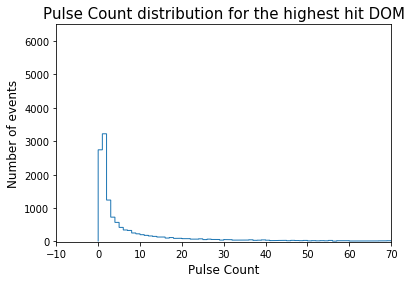

In [36]:
plt.hist(highest_hits, bins=np.max(highest_hits), histtype='step')
plt.xlabel('Pulse Count',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.title("Pulse Count distribution for the highest hit DOM",fontsize=15)
plt.ticklabel_format(style='plain')
plt.xlim(-10,70)
plt.ylim(-10,6500)
plt.show()

In [19]:
np.max(highest_hits)

292221

In [20]:
np.mean(highest_hits)

128.4754678462062

### 3) Pulse count for 2nd highest hit OM on a per event basis...

In [22]:
val=0
dom_pos=[]
second_highest_hits=[]
for i in range(0,400):
    if path.exists("/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst")==True:
        infile_name="/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst"
        infile=dataio.I3File(infile_name)
        infile.pop_frame()
        for frame in infile:
            infile.pop_frame()
            pulseseriesmap=frame['I3Photons']
            for omkey in pulseseriesmap.keys():
                for pulse in pulseseriesmap[omkey]:
                    dom_pos.append(((omkey.string-1)*20)+omkey.om)  
            if (len(dom_pos)!=0):
                val=max(set(dom_pos),key=dom_pos.count)
                dom_pos=list(filter(lambda a: a != val, dom_pos))
            if (len(dom_pos)!=0):
                second_highest_hits.append(dom_pos.count(max(set(dom_pos),key=dom_pos.count)))
            else:
                second_highest_hits.append(0)
            dom_pos=[]

RuntimeError: input stream error

In [124]:
events = np.arange(len(second_highest_hits))

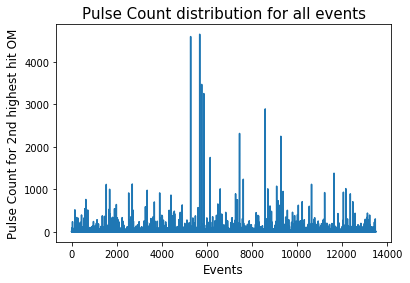

In [125]:
plt.plot(events,second_highest_hits)
plt.xlabel('Events',fontsize=12)
plt.ylabel('Pulse Count for 2nd highest hit OM',fontsize=12)
plt.title("Pulse Count distribution for all events",fontsize=15)
plt.ticklabel_format(style='plain')
plt.show()

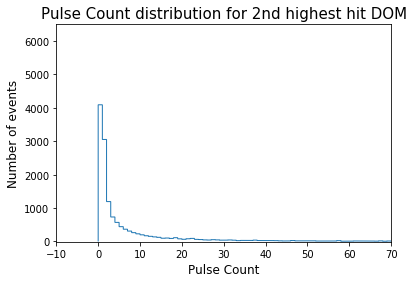

In [35]:
plt.hist(second_highest_hits, bins=np.max(second_highest_hits), histtype='step')
plt.xlabel('Pulse Count',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.title("Pulse Count distribution for 2nd highest hit DOM",fontsize=15)
plt.ticklabel_format(style='plain')
plt.xlim(-10,70)
plt.ylim(-10,6500)
plt.show()

In [24]:
np.max(second_highest_hits)

17634

In [25]:
np.mean(second_highest_hits)

30.8326641714869

### 4) Pulse count for 3rd highest hit OM on a per event basis...

In [27]:
dom_pos=[]
third_highest_hits=[]
for i in range(0,400):
    if path.exists("/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst")==True:
        infile_name="/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst"
        infile=dataio.I3File(infile_name)
        infile.pop_frame()
        for frame in infile:
            infile.pop_frame()
            pulseseriesmap=frame['I3Photons']
            for omkey in pulseseriesmap.keys():
                for pulse in pulseseriesmap[omkey]:
                    dom_pos.append(((omkey.string-1)*20)+omkey.om)  
            for j in range(2):
                if (len(dom_pos)!=0):
                    val=max(set(dom_pos),key=dom_pos.count)
                    dom_pos=list(filter(lambda a: a != val, dom_pos))
            if (len(dom_pos)!=0):
                third_highest_hits.append(dom_pos.count(max(set(dom_pos),key=dom_pos.count)))
            else:
                third_highest_hits.append(0)
            dom_pos=[]

RuntimeError: input stream error

In [49]:
events= np.arange(len(third_highest_hits))

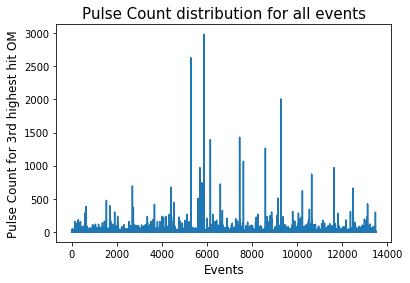

In [50]:
plt.plot(events,third_highest_hits)
plt.xlabel('Events',fontsize=12)
plt.ylabel('Pulse Count for 3rd highest hit OM',fontsize=12)
plt.title("Pulse Count distribution for all events",fontsize=15)
plt.ticklabel_format(style='plain')
plt.show()

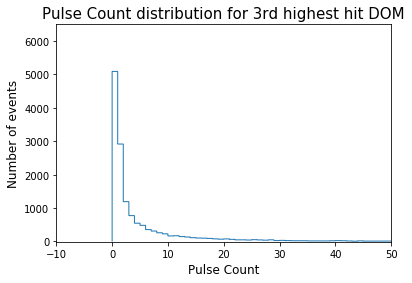

In [34]:
plt.hist(third_highest_hits, bins=np.max(third_highest_hits), histtype='step')
plt.xlabel('Pulse Count',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.title("Pulse Count distribution for 3rd highest hit DOM",fontsize=15)
plt.ticklabel_format(style='plain')
plt.xlim(-10,50)
plt.ylim(-10,6500)
plt.show()

In [105]:
np.max(third_highest_hits)

2983

In [29]:
np.mean(third_highest_hits)

15.658365652854323

### 5) Pulse count for 4th highest hit OM on a per event basis...

In [31]:
dom_pos=[]
fourth_highest_hits=[]
for i in range(0,400):
    if path.exists("/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst")==True:
        infile_name="/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst"
        infile=dataio.I3File(infile_name)
        infile.pop_frame()
        for frame in infile:
            infile.pop_frame()
            pulseseriesmap=frame['I3Photons']
            for omkey in pulseseriesmap.keys():
                for pulse in pulseseriesmap[omkey]:
                    dom_pos.append(((omkey.string-1)*20)+omkey.om)  
            for j in range(3):
                if (len(dom_pos)!=0):
                    val=max(set(dom_pos),key=dom_pos.count)
                    dom_pos=list(filter(lambda a: a != val, dom_pos))
                    
            if (len(dom_pos)!=0):
                fourth_highest_hits.append(dom_pos.count(max(set(dom_pos),key=dom_pos.count)))
            else:
                fourth_highest_hits.append(0)
            dom_pos=[]

RuntimeError: input stream error

In [98]:
events= np.arange(len(fourth_highest_hits))

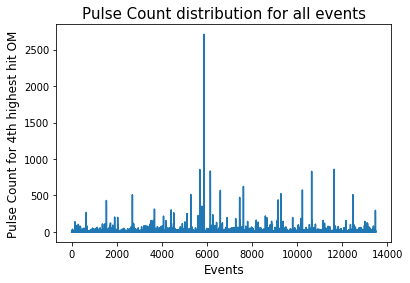

In [99]:
plt.plot(fourth_highest_hits)
plt.xlabel('Events',fontsize=12)
plt.ylabel('Pulse Count for 4th highest hit OM',fontsize=12)
plt.title("Pulse Count distribution for all events",fontsize=15)
plt.ticklabel_format(style='plain')
plt.show()

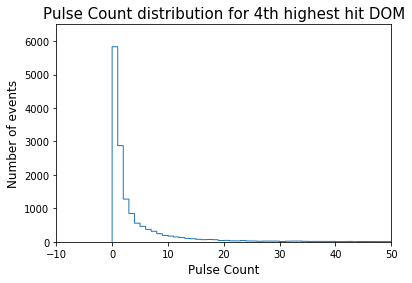

In [33]:
plt.hist(fourth_highest_hits, bins=np.max(fourth_highest_hits), histtype='step')
plt.xlabel('Pulse Count',fontsize=12)
plt.ylabel('Number of events',fontsize=12)
plt.title("Pulse Count distribution for 4th highest hit DOM",fontsize=15)
plt.ticklabel_format(style='plain')
plt.xlim(-10,50)
plt.ylim(0,6500)
plt.show()

In [107]:
np.max(fourth_highest_hits)

2711

In [101]:
np.mean(fourth_highest_hits)

5.405037037037037

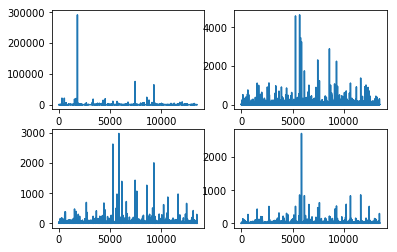

In [127]:
plt.subplot(2,2,1)
plt.plot(highest_hits)
plt.subplot(2,2,2)
plt.plot(second_highest_hits)
plt.subplot(2, 2, 3)
plt.plot(third_highest_hits)
plt.subplot(2, 2, 4)
plt.plot(fourth_highest_hits)
plt.show()

### 6) Pulse count for 2nd highest hit DOM vs Energy of incoming neutrinos

In [10]:
val=0
dom_pos=[]
second_highest_hits=[]
energy_primary=[]
for i in range(0,30):
    if path.exists("/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst")==True:
        infile_name="/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst"
        infile=dataio.I3File(infile_name)
        infile.pop_frame()
        for frame in infile:
            infile.pop_frame()
            pulseseriesmap=frame['I3Photons']
            for omkey in pulseseriesmap.keys():
                for pulse in pulseseriesmap[omkey]:
                    dom_pos.append(((omkey.string-1)*20)+omkey.om)  
            if (len(dom_pos)!=0):
                val=max(set(dom_pos),key=dom_pos.count)
                dom_pos=list(filter(lambda a: a != val, dom_pos))
            if (len(dom_pos)!=0):
                second_highest_hits.append(dom_pos.count(max(set(dom_pos),key=dom_pos.count)))
            else:
                second_highest_hits.append(0)
            energy_primary.append(frame['NuGPrimary'].energy)
            dom_pos=[]

In [11]:
energy_primary=np.log10(energy_primary)

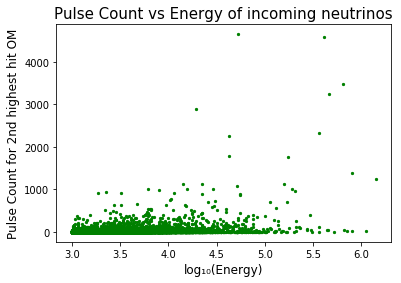

In [12]:
plt.scatter(energy_primary,second_highest_hits,color='green',s=5)
plt.xlabel("log\u2081\u2080(Energy)",fontsize=12)
plt.ylabel("Pulse Count for 2nd highest hit OM",fontsize=12)
plt.title("Pulse Count vs Energy of incoming neutrinos",fontsize=15)
plt.show()

### 7) Pulse count for 3rd highest hit DOM vs Energy of incoming neutrinos


In [2]:
energy_primary=[]
dom_pos=[]
third_highest_hits=[]
for i in range(0,30):
    if path.exists("/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst")==True:
        infile_name="/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst"
        infile=dataio.I3File(infile_name)
        infile.pop_frame()
        for frame in infile:
            infile.pop_frame()
            pulseseriesmap=frame['I3Photons']
            for omkey in pulseseriesmap.keys():
                for pulse in pulseseriesmap[omkey]:
                    dom_pos.append(((omkey.string-1)*20)+omkey.om)  
            for j in range(2):
                if (len(dom_pos)!=0):
                    val=max(set(dom_pos),key=dom_pos.count)
                    dom_pos=list(filter(lambda a: a != val, dom_pos))
            if (len(dom_pos)!=0):
                third_highest_hits.append(dom_pos.count(max(set(dom_pos),key=dom_pos.count)))
            else:
                third_highest_hits.append(0)
            energy_primary.append(frame['NuGPrimary'].energy)
            dom_pos=[]

In [3]:
energy_primary=np.log10(energy_primary)

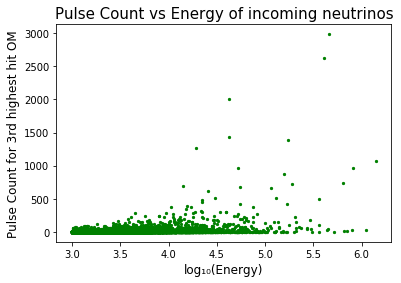

In [4]:
plt.scatter(energy_primary,third_highest_hits,color='green',s=5)
plt.xlabel("log\u2081\u2080(Energy)",fontsize=12)
plt.ylabel("Pulse Count for 3rd highest hit OM",fontsize=12)
plt.title("Pulse Count vs Energy of incoming neutrinos",fontsize=15)
plt.show()

### 8) Pulse count for 4th highest hit DOM vs Energy of incoming neutrinos

In [5]:
energy_primary=[]
dom_pos=[]
fourth_highest_hits=[]
for i in range(0,30):
    if path.exists("/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst")==True:
        infile_name="/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst"
        infile=dataio.I3File(infile_name)
        infile.pop_frame()
        for frame in infile:
            infile.pop_frame()
            pulseseriesmap=frame['I3Photons']
            for omkey in pulseseriesmap.keys():
                for pulse in pulseseriesmap[omkey]:
                    dom_pos.append(((omkey.string-1)*20)+omkey.om)  
            for j in range(3):
                if (len(dom_pos)!=0):
                    val=max(set(dom_pos),key=dom_pos.count)
                    dom_pos=list(filter(lambda a: a != val, dom_pos))
                    
            if (len(dom_pos)!=0):
                fourth_highest_hits.append(dom_pos.count(max(set(dom_pos),key=dom_pos.count)))
            else:
                fourth_highest_hits.append(0)
            energy_primary.append(frame['NuGPrimary'].energy)
            dom_pos=[]

In [6]:
energy_primary=np.log10(energy_primary)

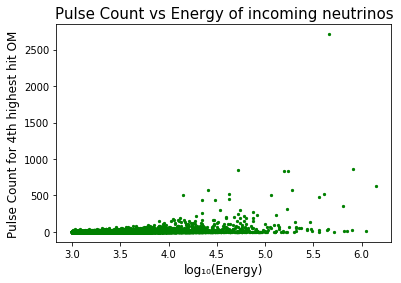

In [7]:
plt.scatter(energy_primary,fourth_highest_hits,color='green',s=5)
plt.xlabel("log\u2081\u2080(Energy)",fontsize=12)
plt.ylabel("Pulse Count for 4th highest hit OM",fontsize=12)
plt.title("Pulse Count vs Energy of incoming neutrinos",fontsize=15)
plt.show()

### 7) Npulses vs Zenith angle

In [8]:
pulse_count=[]
zenith_primary=[]
for i in range(0,30):
    if path.exists("/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst")==True:
        infile_name="/data/p-one/kdutta/Neutau_photon_propogate/Nu"+str(i)+".i3.zst"
        infile=dataio.I3File(infile_name)
        infile.pop_frame()
        for frame in infile:
            pulses=0
            infile.pop_frame()
            mctree=frame['I3MCTree']
            neutrino=mctree.get_primaries()
            n=neutrino[0]
            zenith_primary.append(n.dir.zenith)
            pulseseriesmap=frame['I3Photons']
            for omkey in pulseseriesmap.keys():
                for pulse in pulseseriesmap[omkey]:
                    pulses=pulses+1
            pulse_count.append(pulses)
    else:
        continue

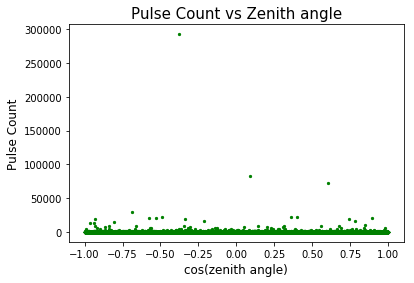

In [9]:
plt.scatter(np.cos(zenith_primary),pulse_count,color='green',s=5)
plt.xlabel("cos(zenith angle)",fontsize=12)
plt.ylabel("Pulse Count",fontsize=12)
plt.title("Pulse Count vs Zenith angle",fontsize=15)
plt.show()